### Problem Statement : Predict the different species of flowers on the length of there petals and sepals. ###

#### Importing Libraries ####

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Reading Dataset ####

In [2]:
df=pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#checking for null values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
df['species']=le.fit_transform(df[['species']])

In [11]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
df['species'].value_counts().reset_index()

,species,count
0,0,50
1,1,50
2,2,50


**Exploratory Data Analysis**

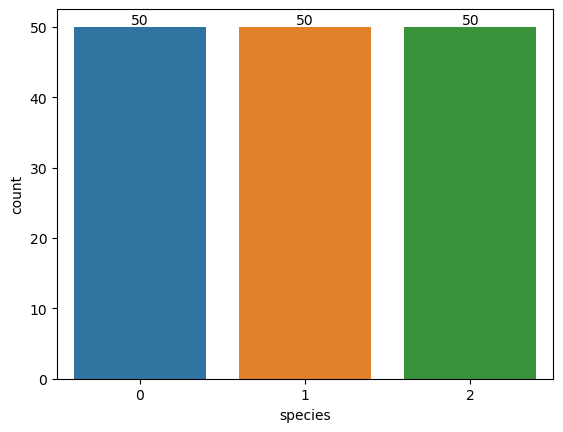

In [13]:
ax=sns.countplot(x='species',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

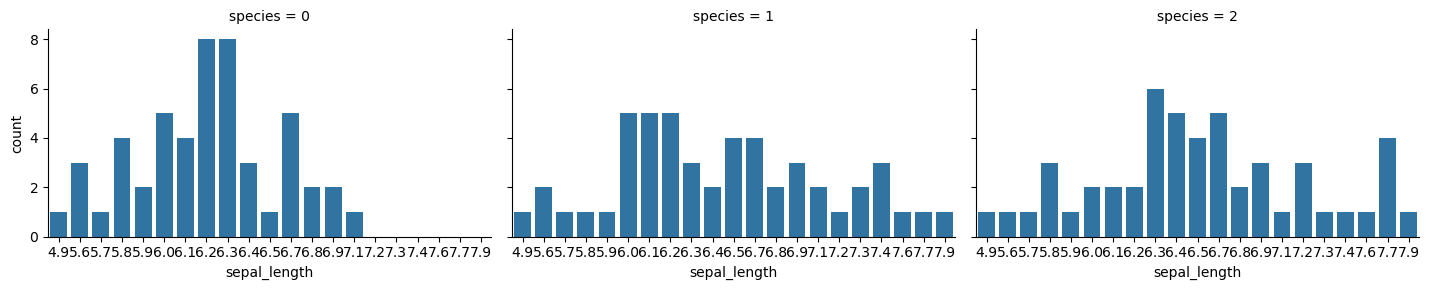

In [14]:
grid=sns.FacetGrid(df,col='species',aspect=1.6)
grid.map(sns.countplot,'sepal_length')

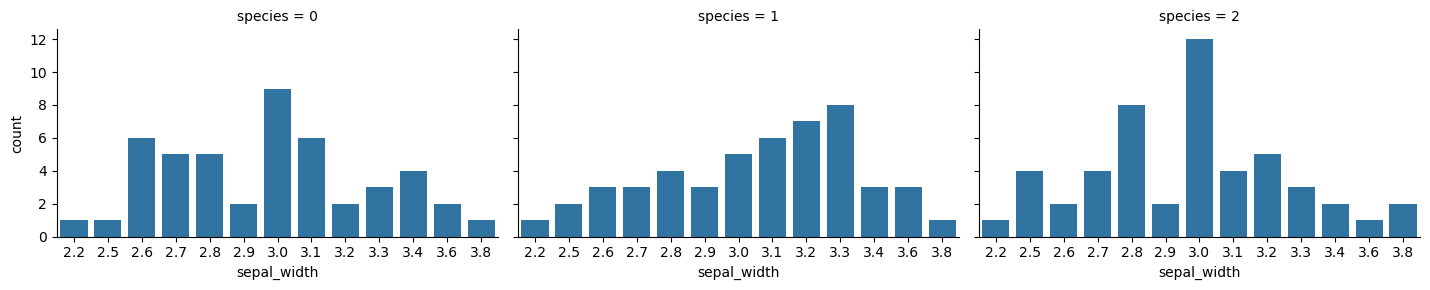

In [15]:
grid=sns.FacetGrid(df,col='species',aspect=1.6)
grid.map(sns.countplot,'sepal_width')

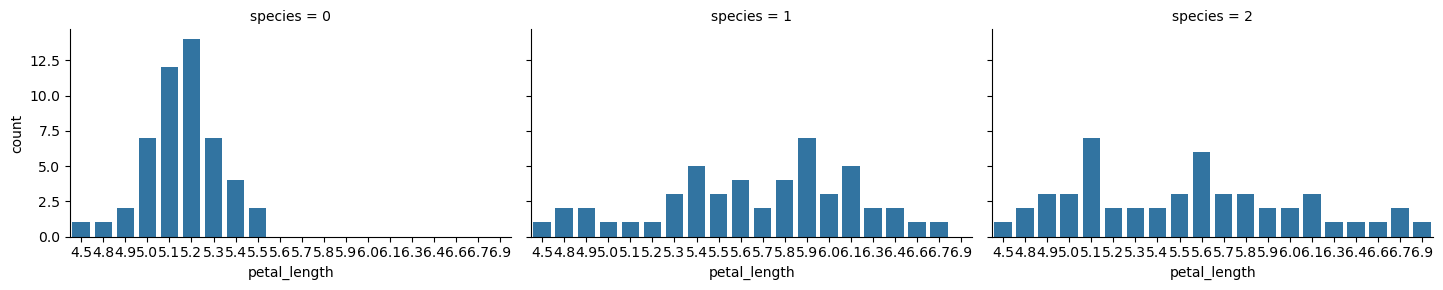

In [16]:
grid=sns.FacetGrid(df,col='species',aspect=1.6)
grid.map(sns.countplot,'petal_length')

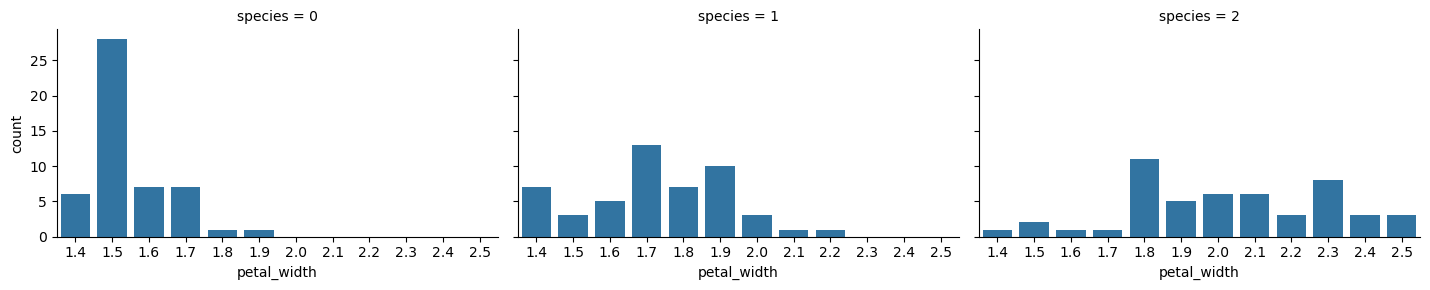

In [17]:
grid=sns.FacetGrid(df,col='species',aspect=1.6)
grid.map(sns.countplot,'petal_width')

**Correlation Matrix**

In [18]:
corr=df.corr()

<Axes: >

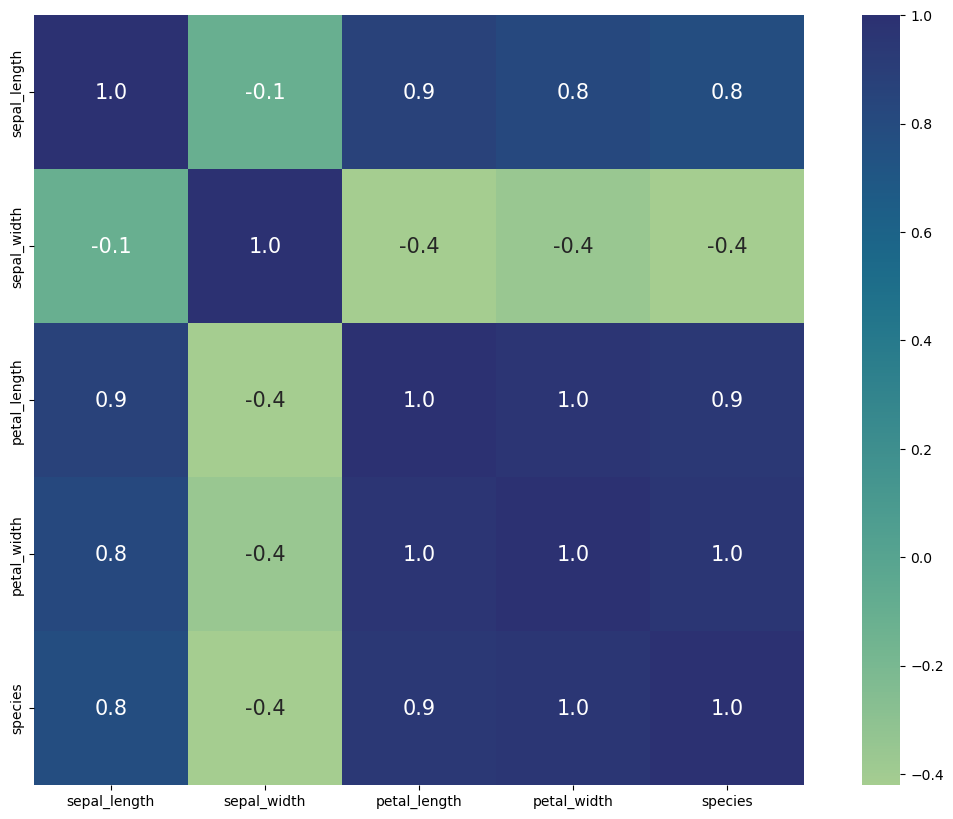

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,square=True,cbar=True,fmt='.1f',annot=True,annot_kws={'size':15},cmap='crest')

**Spiliting the data**

In [20]:
x=df.iloc[:,:4]
y=df.iloc[:,4]

In [21]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
x_train.shape

(105, 4)

In [25]:
x_test.shape

(45, 4)

In [26]:
y_train.shape

(105,)

In [27]:
y_test.shape

(45,)

#### Model Training ####

In [28]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [29]:
LR.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_pred=LR.predict(x_test)

In [31]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
acc=accuracy_score(y_test,y_pred)
print("Accuracy of model is:",acc)

Accuracy of model is: 0.9777777777777777
